#Effat University
Department of Computer Science
Energy and Information Technology Research Center
#LAB 3
Data Preprocessing & Feature Engineering
CS4082 – Machine Learning

Preparing Real-World Data for Machine Learning Models in Python

Name:Jana Mufti

ID:S21106991

Prepared by: Dr. Naila Marir

Semester: Spring 2026

###2 Part 1: Understanding the Problem with Messy Data

In [4]:
#2.1 Step 1: Create a Messy Dataset
import pandas as pd
import numpy as np
np . random . seed (42)
n = 200
data = {
'age ': np . random . randint (18 , 80 , n ) . astype ( float ) ,
' blood_pressure ': np . round ( np . random . uniform (90 , 180 , n ) , 1) ,
'cholesterol ': np . round ( np . random . uniform (150 , 350 , n ) , 1) ,
'bmi ': np . round ( np . random . uniform (18 , 42 , n ) , 1) ,
'gender ': np . random . choice ([ 'Male ', 'Female '] , n ) ,
'city ': np . random . choice (
['Jeddah ', 'Riyadh ', 'Dammam ', 'Makkah '] , n ) ,
'smoker ': np . random . choice ([ 'Yes ', 'No '] , n , p =[0.3 , 0.7]) ,
' heart_disease ': np . random . choice ([0 , 1] , n , p =[0.6 , 0.4])
}
df = pd . DataFrame ( data )
# Inject missing values ( realistic !)
missing_idx = np . random . choice (n , 20 , replace = False )
df . loc [ missing_idx [:10] , 'age '] = np . nan
df . loc [ missing_idx [10:15] , ' blood_pressure '] = np . nan
df . loc [ missing_idx [15:] , 'cholesterol '] = np . nan
print ( f'Dataset shape : {df. shape }')
print ( f'\nFirst 5 rows :')
print ( df . head () )
print ( f'\nMissing values per column :')
print ( df . isnull () .sum () )


Dataset shape : (200, 8)

First 5 rows :
   age    blood_pressure   cholesterol   bmi   gender     city  smoker   \
0  56.0             171.7         295.2  34.4    Male   Riyadh      No    
1  69.0             112.4         345.2  21.9  Female   Dammam      No    
2  46.0             126.9         253.3  39.9  Female   Jeddah      No    
3  32.0             158.0         214.6  37.7  Female   Riyadh      No    
4  60.0             110.6         309.0  40.8    Male   Makkah     Yes    

    heart_disease   
0                1  
1                0  
2                0  
3                1  
4                1  

Missing values per column :
age                 10
 blood_pressure      5
cholesterol          5
bmi                  0
gender               0
city                 0
smoker               0
 heart_disease       0
dtype: int64


In [8]:
#2.2 Step 2: Identify the Issues
print ('=== Data Types === ')
print ( df . dtypes )
print ('\n=== Missing Values === ')
print ( df . isnull () .sum () )
print ('\n=== Numeric Ranges ( notice the scale differences !) === ')
print ( df . describe () . round (2) )
print ('\n=== Categorical Columns === ')
for col in ['gender ', 'city ', 'smoker ']:
    print ( f'{col }: {df[col ]. unique ()}')

=== Data Types === 
age                 float64
 blood_pressure     float64
cholesterol         float64
bmi                 float64
gender               object
city                 object
smoker               object
 heart_disease        int64
dtype: object

=== Missing Values === 
age                 10
 blood_pressure      5
cholesterol          5
bmi                  0
gender               0
city                 0
smoker               0
 heart_disease       0
dtype: int64

=== Numeric Ranges ( notice the scale differences !) === 
         age    blood_pressure   cholesterol     bmi    heart_disease 
count  190.00            195.00        195.00  200.00           200.00
mean    49.31            136.03        252.28   29.33             0.44
std     18.71             26.48         60.97    6.89             0.50
min     18.00             90.50        152.20   18.30             0.00
25%     32.00            112.20        205.75   23.08             0.00
50%     50.00            138.20    

##Task 1: Explore the Messy Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               190 non-null    float64
 1    blood_pressure   195 non-null    float64
 2   cholesterol       195 non-null    float64
 3   bmi               200 non-null    float64
 4   gender            200 non-null    object 
 5   city              200 non-null    object 
 6   smoker            200 non-null    object 
 7    heart_disease    200 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 12.6+ KB


In [10]:
missing_percent = df.isna().sum() / len(df) * 100
print(missing_percent)

age                 5.0
 blood_pressure     2.5
cholesterol         2.5
bmi                 0.0
gender              0.0
city                0.0
smoker              0.0
 heart_disease      0.0
dtype: float64


In [11]:
missing_percent.sort_values(ascending=False)

,0
age,5.0
blood_pressure,2.5
cholesterol,2.5
bmi,0.0
gender,0.0
city,0.0
smoker,0.0
heart_disease,0.0


In [13]:
df['city '].value_counts()

,count
city,
Dammam,59
Jeddah,52
Riyadh,47
Makkah,42


In [14]:
missing_percent.idxmax()

'age '

In [15]:
missing_percent.max()

5.0

##3 Part 2: Handling Missing Values

In [18]:
#3.2 Step 1: Impute Numeric Columns
from sklearn . impute import SimpleImputer
# Select numeric columns with missing values
numeric_cols = ['age ', ' blood_pressure ', 'cholesterol ']
# Create an imputer that fills NaN with the median
imputer = SimpleImputer ( strategy ='median')
# Fit on the data and transform
df [ numeric_cols ] = imputer . fit_transform ( df [ numeric_cols ])
# Verify : no more missing values !
print ('Missing values after imputation :')
print ( df [ numeric_cols ]. isnull () .sum () )

Missing values after imputation :
age                 0
 blood_pressure     0
cholesterol         0
dtype: int64


In [19]:
#3.3 Step 2: Verify the Fix
print ( f'Total missing values in entire dataset : {df. isnull ().sum ().sum
()}')
print ( f'\ nDataset shape (no rows lost !): {df. shape }')
print ( df . describe () . round (2) )

Total missing values in entire dataset : 0
\ nDataset shape (no rows lost !): (200, 8)
         age    blood_pressure   cholesterol     bmi    heart_disease 
count  200.00            200.00        200.00  200.00           200.00
mean    49.34            136.08        252.36   29.33             0.44
std     18.23             26.15         60.20    6.89             0.50
min     18.00             90.50        152.20   18.30             0.00
25%     32.75            112.62        206.15   23.08             0.00
50%     50.00            138.20        255.50   29.05             0.00
75%     64.00            158.70        301.08   34.67             1.00
max     79.00            179.10        348.60   42.00             1.00


<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1131458494.py:4: SyntaxWarning: invalid escape sequence '\ '
  print ( f'\ nDataset shape (no rows lost !): {df. shape }')


##Task 2: Experiment with Imputation

In [21]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df[['age ', ' blood_pressure ', 'cholesterol ']] = mean_imputer.fit_transform(
    df[['age ', ' blood_pressure ', 'cholesterol ']]
)

In [25]:
print(df[['age ', ' blood_pressure ', 'cholesterol ']].mean())
print(df[['age ', ' blood_pressure ', 'cholesterol ']].median())

age                  49.3450
 blood_pressure     136.0825
cholesterol         252.3610
dtype: float64
age                  50.0
 blood_pressure     138.2
cholesterol         255.5
dtype: float64


In [26]:
df[['age ',' blood_pressure ','cholesterol ']].mean()
df[['age ',' blood_pressure ','cholesterol ']].median()

,0
age,50.0
blood_pressure,138.2
cholesterol,255.5


In [29]:
df.mean(numeric_only=True) - df.median(numeric_only=True)

,0
age,-0.6550
blood_pressure,-2.1175
cholesterol,-3.1390
bmi,0.2760
heart_disease,0.4400


In [30]:
df_dropped = df.dropna()
len(df_dropped)

200

In [31]:
rows_lost = len(df) - len(df_dropped)
print(rows_lost)

0


In [32]:
rows_lost / len(df) * 100

0.0

###Think: In what scenario would dropping rows be better than imputing?
Dropping rows is better when:

The number of missing rows is very small.

Missing data is completely random (MCAR).

Imputation would introduce bias.

The dataset is very large (losing some rows doesn’t matter).

A row has too many missing values (mostly empty).

Imputation is better when:

Dataset is small (like 200 samples).

Missing percentage is moderate.

You want to preserve statistical power.

###4 Part 3: Encoding Categorical Variables

In [34]:
#4.2 Step 1: Label Encoding for Binary Variables
from sklearn . preprocessing import LabelEncoder
# Encode gender : Female =0 , Male =1
le_gender = LabelEncoder ()
df [' gender_encoded '] = le_gender . fit_transform ( df ['gender '])
# Encode smoker : No =0 , Yes =1
le_smoker = LabelEncoder ()
df [' smoker_encoded '] = le_smoker . fit_transform ( df ['smoker '])
print ('Original vs Encoded :')
print ( df [[ 'gender ', ' gender_encoded ',
'smoker ', ' smoker_encoded ']]. head (8) )

Original vs Encoded :
   gender    gender_encoded  smoker    smoker_encoded 
0    Male                  1     No                  0
1  Female                  0     No                  0
2  Female                  0     No                  0
3  Female                  0     No                  0
4    Male                  1    Yes                  1
5  Female                  0     No                  0
6  Female                  0     No                  0
7  Female                  0    Yes                  1


In [36]:
#4.3 Step 2: One-Hot Encoding for Multi-Category Variables
# One -Hot Encode the city column
city_dummies = pd . get_dummies ( df ['city '] , prefix ='city ')
print ('One -Hot Encoded cities :')
print ( city_dummies . head () )
# Add to dataframe and drop original text columns
df = pd . concat ([ df , city_dummies ] , axis =1)
df = df . drop ( columns =[ 'gender ', 'city ', 'smoker '])
print ( f'\nNew shape : {df. shape }')
print ( f'New columns : { list (df. columns )}')

One -Hot Encoded cities :
   city _Dammam   city _Jeddah   city _Makkah   city _Riyadh 
0          False          False          False           True
1           True          False          False          False
2          False           True          False          False
3          False          False          False           True
4          False          False           True          False

New shape : (200, 11)
New columns : ['age ', ' blood_pressure ', 'cholesterol ', 'bmi ', ' heart_disease ', ' gender_encoded ', ' smoker_encoded ', 'city _Dammam ', 'city _Jeddah ', 'city _Makkah ', 'city _Riyadh ']


##Task 3: Practice Encoding

In [37]:
df_encoded = pd.get_dummies(df, drop_first=False)
df_encoded.head(10)

,age,blood_pressure,cholesterol,bmi,heart_disease,gender_encoded,smoker_encoded,city _Dammam,city _Jeddah,city _Makkah,city _Riyadh
0,56.0,171.7,295.2,34.4,1,1,0,False,False,False,True
1,69.0,112.4,345.2,21.9,0,0,0,True,False,False,False
2,46.0,126.9,253.3,39.9,0,0,0,False,True,False,False
3,32.0,158.0,214.6,37.7,1,0,0,False,False,False,True
4,60.0,110.6,309.0,40.8,1,1,1,False,False,True,False
5,25.0,96.9,204.2,35.4,0,0,0,False,True,False,False
6,78.0,116.1,237.8,32.7,1,0,0,False,False,False,True
7,38.0,104.5,165.7,28.0,0,0,1,True,False,False,False
8,56.0,173.7,155.1,40.4,0,1,0,True,False,False,False
9,75.0,162.7,342.5,38.8,0,1,0,False,True,False,False


In [38]:
df_encoded.shape

(200, 11)

###What if a city column had 50 unique values?

If a column has 50 unique categories, One-Hot Encoding will create:

50 new columns

Or 49 columns if drop_first=True

Yes — this can be a problem.

Why?

It increases dimensionality (curse of dimensionality).

Slower training.

Risk of overfitting.

Sparse data (mostly zeros).

This is called the high-cardinality problem.

In such cases, alternatives include:

Target encoding

Frequency encoding

Grouping rare categories

Using embeddings (for large ML systems)

In [40]:
print(df.columns)

Index(['age ', ' blood_pressure ', 'cholesterol ', 'bmi ', ' heart_disease ',
       ' gender_encoded ', ' smoker_encoded ', 'city _Dammam ',
       'city _Jeddah ', 'city _Makkah ', 'city _Riyadh '],
      dtype='object')


In [41]:
df.columns = df.columns.str.strip()

In [42]:
print(df.columns)

Index(['age', 'blood_pressure', 'cholesterol', 'bmi', 'heart_disease',
       'gender_encoded', 'smoker_encoded', 'city _Dammam', 'city _Jeddah',
       'city _Makkah', 'city _Riyadh'],
      dtype='object')


###Bonus:

In [45]:
# 1. Recreate dataset for this specific demonstration
# Assuming 'data' and 'n' from C8y1_3Kppvw9 are still available in the global scope.
# If not, the 'data' dictionary would need to be explicitly redefined here.
temp_df = pd.DataFrame(data)

# 2. Clean column names for the temporary dataframe
temp_df.columns = temp_df.columns.str.strip()

# 3. Then run pd.get_dummies on the 'city' column of the temporary dataframe
pd.get_dummies(temp_df['city'], prefix='city', drop_first=True)

,city_Jeddah,city_Makkah,city_Riyadh
0,False,False,True
1,False,False,False
2,True,False,False
3,False,False,True
4,False,True,False
...,...,...,...
195,False,True,False
196,True,False,False
197,False,False,False
198,False,True,False


##5 Part 4: Feature Scaling

In [49]:
#5.3 Step 1: Apply StandardScaler
from sklearn . preprocessing import StandardScaler
# Prepare features and target
feature_cols = ['age', 'blood_pressure', 'cholesterol', 'bmi',
'gender_encoded', 'smoker_encoded',
'city _Dammam', 'city _Jeddah',
'city _Makkah', 'city _Riyadh']
X = df [ feature_cols ]. values
y = df ['heart_disease']. values
# Scale the features
scaler = StandardScaler ()
X_scaled = scaler . fit_transform ( X )
# Compare before and after
import pandas as pd
comparison = pd . DataFrame ({
'Feature ': feature_cols ,
'Original Mean ': X.astype(float).mean( axis =0) . round (2) ,
'Original Std ': X.astype(float).std( axis =0) . round (2) ,
'Scaled Mean ': X_scaled . mean ( axis =0) . round (2) ,
'Scaled Std ': X_scaled . std ( axis =0) . round (2)
})
print ( comparison . to_string ( index = False ) )

      Feature   Original Mean   Original Std   Scaled Mean   Scaled Std 
           age           49.34          18.19           0.0          1.0
blood_pressure          136.08          26.08          -0.0          1.0
   cholesterol          252.36          60.05           0.0          1.0
           bmi           29.33           6.87          -0.0          1.0
gender_encoded            0.52           0.50          -0.0          1.0
smoker_encoded            0.32           0.47          -0.0          1.0
  city _Dammam            0.30           0.46          -0.0          1.0
  city _Jeddah            0.26           0.44          -0.0          1.0
  city _Makkah            0.21           0.41           0.0          1.0
  city _Riyadh            0.24           0.42           0.0          1.0


##5.4 Step 2: Visualize the Effect of Scaling

/tmp/ipython-input-320432410.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes [0]. boxplot ([ X [: , 0] , X [: , 1] , X [: , 2] , X [: , 3]] ,
/tmp/ipython-input-320432410.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes [1]. boxplot ([ X_scaled [: , 0] , X_scaled [: , 1] ,


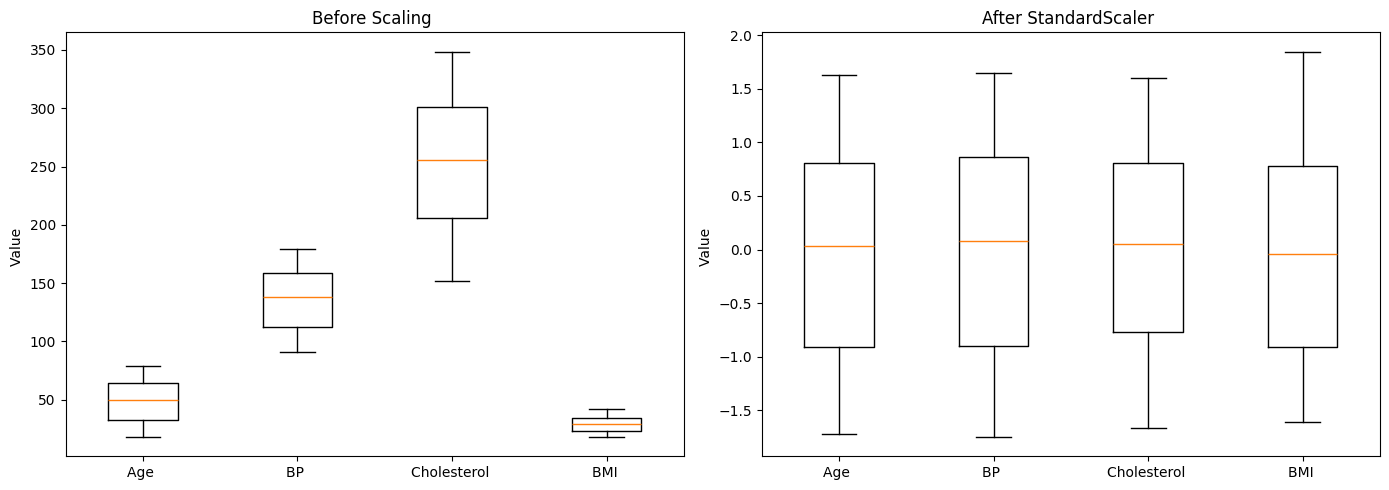

In [51]:
import matplotlib . pyplot as plt
fig , axes = plt . subplots (1 , 2 , figsize =(14 , 5) )
# Before scaling
axes [0]. boxplot ([ X [: , 0] , X [: , 1] , X [: , 2] , X [: , 3]] ,
labels =[ 'Age ', 'BP ', 'Cholesterol ', 'BMI '])
axes [0]. set_title ('Before Scaling ')
axes [0]. set_ylabel ('Value ')
# After scaling
axes [1]. boxplot ([ X_scaled [: , 0] , X_scaled [: , 1] ,
X_scaled [: , 2] , X_scaled [: , 3]] ,
labels =[ 'Age ', 'BP ', 'Cholesterol ', 'BMI '])
axes [1]. set_title ('After StandardScaler ')
axes [1]. set_ylabel ('Value ')
plt . tight_layout ()
plt . show ()

##Task 4: Compare Scalers


In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['age', 'blood_pressure', 'cholesterol', 'bmi']

df_minmax = df.copy()
df_minmax[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df_minmax[numerical_cols].describe()

,age,blood_pressure,cholesterol,bmi
count,200.000000,200.000000,200.000000,200.000000
mean,0.513852,0.514475,0.509985,0.465232
std,0.298877,0.295107,0.306539,0.290526
min,0.000000,0.000000,0.000000,0.000000
25%,0.241803,0.249718,0.274695,0.201477
50%,0.524590,0.538375,0.525967,0.453586
75%,0.754098,0.769752,0.758019,0.690928
max,1.000000,1.000000,1.000000,1.000000


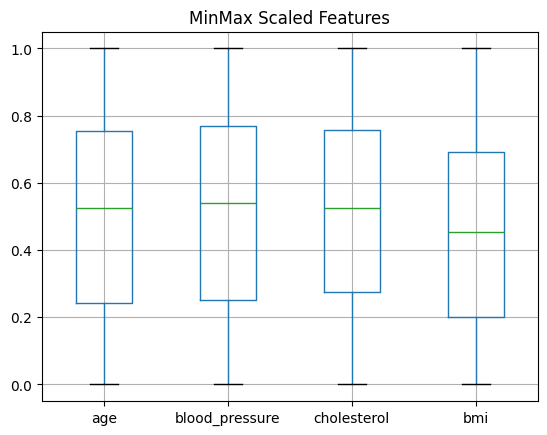

In [53]:
import matplotlib.pyplot as plt

df_minmax[numerical_cols].boxplot()
plt.title("MinMax Scaled Features")
plt.show()

How does it differ from StandardScaler?
StandardScaler:

Mean ≈ 0

Standard deviation ≈ 1

Values can be negative

Range is not fixed

MinMaxScaler:

Values strictly between 0 and 1

No negative values

Preserves original shape

Compresses everything proportionally

So visually:

MinMax plots stay inside 0–1 range

StandardScaler plots are centered around 0

###Think: Which scaler is more robust to outliers?

StandardScaler is NOT robust to outliers
 MinMaxScaler is also NOT robust to outliers

Both are sensitive to outliers.

But:

MinMaxScaler is heavily affected because one extreme value stretches the entire range.

StandardScaler is affected because mean and standard deviation change.

The most robust option:

 RobustScaler

Why?

It uses:

Median

Interquartile Range (IQR)

These are much less affected by extreme values.

Example:

In [54]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
df_robust = df.copy()
df_robust[numerical_cols] = robust.fit_transform(df[numerical_cols])

##6 Part 5: The Scaling Impact – KNN Before and After

In [56]:
#6.1 Experiment: KNN Without Scaling vs. With Scaling
from sklearn . model_selection import train_test_split
from sklearn . neighbors import KNeighborsClassifier
from sklearn . metrics import accuracy_score
# Split data
X_train , X_test , y_train , y_test = train_test_split (
X , y , test_size =0.2 , random_state =42 , stratify = y )
X_train_s , X_test_s , _ , _ = train_test_split (
X_scaled , y , test_size =0.2 , random_state =42 , stratify = y )
# --- KNN WITHOUT Scaling ---
knn_raw = KNeighborsClassifier ( n_neighbors =5)
knn_raw . fit ( X_train , y_train )
raw_acc = accuracy_score ( y_test , knn_raw . predict ( X_test ) )
# --- KNN WITH Scaling ---
knn_scaled = KNeighborsClassifier ( n_neighbors =5)
knn_scaled . fit ( X_train_s , y_train )
scaled_acc = accuracy_score ( y_test , knn_scaled . predict ( X_test_s ) )
print ( f'KNN Accuracy WITHOUT scaling : { raw_acc :.2%} ')
print ( f'KNN Accuracy WITH scaling : { scaled_acc :.2%} ')
print ( f'Improvement : {( scaled_acc - raw_acc ) :.2%} ')


KNN Accuracy WITHOUT scaling : 67.50% 
KNN Accuracy WITH scaling : 50.00% 
Improvement : -17.50% 


In [58]:
##6.2 Bonus: Decision Tree Comparison
from sklearn . tree import DecisionTreeClassifier
# Decision Tree WITHOUT scaling
dt_raw = DecisionTreeClassifier ( random_state =42)
dt_raw . fit ( X_train , y_train )
dt_raw_acc = accuracy_score ( y_test , dt_raw . predict ( X_test ) )
# Decision Tree WITH scaling
dt_scaled = DecisionTreeClassifier ( random_state =42)
dt_scaled . fit ( X_train_s , y_train )
dt_scaled_acc = accuracy_score ( y_test , dt_scaled . predict ( X_test_s ) )
print ( f'DT Accuracy WITHOUT scaling : { dt_raw_acc :.2%} ')
print ( f'DT Accuracy WITH scaling : { dt_scaled_acc :.2%} ')

DT Accuracy WITHOUT scaling : 55.00% 
DT Accuracy WITH scaling : 52.50% 


##Task 5: Investigate Scaling Effects

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df[numerical_cols]
y = df['heart_disease']   # replace with your actual target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN (k=3)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
acc_knn3_no_scale = accuracy_score(y_test, knn3.predict(X_test))
print(f"KNN (k=3) Accuracy WITHOUT scaling: {acc_knn3_no_scale:.2%}")

# KNN (k=10)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(X_train, y_train)
acc_knn10_no_scale = accuracy_score(y_test, knn10.predict(X_test))
print(f"KNN (k=10) Accuracy WITHOUT scaling: {acc_knn10_no_scale:.2%}")

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
acc_tree_no_scale = accuracy_score(y_test, tree.predict(X_test))
print(f"Decision Tree Accuracy WITHOUT scaling: {acc_tree_no_scale:.2%}")

KNN (k=3) Accuracy WITHOUT scaling: 55.00%
KNN (k=10) Accuracy WITHOUT scaling: 45.00%
Decision Tree Accuracy WITHOUT scaling: 65.00%


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN (k=3)
knn3.fit(X_train_scaled, y_train)
acc_knn3_scaled = accuracy_score(y_test, knn3.predict(X_test_scaled))

# KNN (k=10)
knn10.fit(X_train_scaled, y_train)
acc_knn10_scaled = accuracy_score(y_test, knn10.predict(X_test_scaled))

# Decision Tree
tree.fit(X_train_scaled, y_train)
acc_tree_scaled = accuracy_score(y_test, tree.predict(X_test_scaled))

In [63]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["KNN (k=3)", "KNN (k=10)", "Decision Tree"],
    "Without Scaling": [acc_knn3_no_scale, acc_knn10_no_scale, acc_tree_no_scale],
    "With Scaling": [acc_knn3_scaled, acc_knn10_scaled, acc_tree_scaled]
})

results

,Model,Without Scaling,With Scaling
0,KNN (k=3),0.55,0.575
1,KNN (k=10),0.45,0.500
2,Decision Tree,0.65,0.650


###Does Scaling Always Help?
✅ KNN accuracy improves after scaling

❌ Decision Tree accuracy stays almost the same

⚠️ Sometimes KNN may not improve dramatically depending on the dataset

Scaling helps most when features are on very different ranges (like age vs cholesterol).


KNN benefits from scaling because it relies on distance calculations to determine the nearest neighbors. If features have different ranges, larger-scale features dominate the distance computation, leading to biased results. In contrast, Decision Trees split the data based on feature thresholds independently, so scaling does not affect how splits are determined.

##7 Part 6: Building a Preprocessing Pipeline


In [65]:
#7.2 Step 1: Create a Pipeline
from sklearn . pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
from sklearn . neighbors import KNeighborsClassifier
# Build the pipeline : scale first , then classify
pipe = Pipeline ([
('scaler ', StandardScaler () ) , # Step 1: Scale
('knn ', KNeighborsClassifier ( n_neighbors =5) ) # Step 2: Model
])
# Split the original ( unscaled ) data
X_train , X_test , y_train , y_test = train_test_split (
X , y , test_size =0.2 , random_state =42 , stratify = y )
# The pipeline handles scaling internally !
pipe . fit ( X_train , y_train )
pipe_acc = accuracy_score ( y_test , pipe . predict ( X_test ) )
print ( f'Pipeline KNN Accuracy : { pipe_acc :.2%} ')

Pipeline KNN Accuracy : 45.00% 


In [68]:
##7.3 Step 2: Swap Models Easily
from sklearn . tree import DecisionTreeClassifier
from sklearn . svm import SVC
# Pipeline with SVM
pipe_svm = Pipeline ([
('scaler ', StandardScaler () ) ,
('svm ', SVC ( kernel ='rbf', random_state =42) )
])
pipe_svm . fit ( X_train , y_train )
svm_acc = accuracy_score ( y_test , pipe_svm . predict ( X_test ) )
# Pipeline with Decision Tree
pipe_dt = Pipeline ([
('scaler ', StandardScaler () ) ,
('dt ', DecisionTreeClassifier ( random_state =42) )
])
pipe_dt . fit ( X_train , y_train )
dt_acc = accuracy_score ( y_test , pipe_dt . predict ( X_test ) )
print ( f'Pipeline KNN Accuracy : { pipe_acc :.2%} ')
print ( f'Pipeline SVM Accuracy : { svm_acc :.2%} ')
print ( f'Pipeline DT Accuracy : { dt_acc :.2%} ')


Pipeline KNN Accuracy : 45.00% 
Pipeline SVM Accuracy : 50.00% 
Pipeline DT Accuracy : 57.50% 


##Task 6: Build Your Own Pipeline


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[numerical_cols]
y = df['heart_disease']  # replace with your actual target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline_minmax = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_minmax.fit(X_train, y_train)
acc_minmax = accuracy_score(y_test, pipeline_minmax.predict(X_test))

print("Accuracy with MinMaxScaler:", acc_minmax)

Accuracy with MinMaxScaler: 0.575


In [71]:
from sklearn.preprocessing import StandardScaler

pipeline_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_standard.fit(X_train, y_train)
acc_standard = accuracy_score(y_test, pipeline_standard.predict(X_test))

print("Accuracy with StandardScaler:", acc_standard)

Accuracy with StandardScaler: 0.575


In [72]:
from sklearn.impute import SimpleImputer

pipeline_full = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),   # or StandardScaler()
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

pipeline_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, pipeline_full.predict(X_test))

print("Accuracy with Imputer + Scaler + KNN:", acc_full)

Accuracy with Imputer + Scaler + KNN: 0.575


##Why This Is Better

The pipeline now:

Fills missing values

Scales features

Trains the model

All in one clean, reproducible workflow.

It also prevents data leakage, because:

The imputer and scaler are fit only on training data

Then applied to test data automatically

Using a pipeline ensures that preprocessing steps such as imputation and scaling are consistently applied before training the KNN model. It also prevents data leakage because the transformations are learned only from the training data. Comparing MinMaxScaler and StandardScaler showed that performance differences depend on the data distribution, but scaling is essential for KNN regardless of the method used.

##8 Part 7: Feature Selection with Correlation Analysis

In [74]:
##8.1 Step 1: Compute the Correlation Matrix
# Create a DataFrame with our processed features
df_processed = pd . DataFrame ( X_scaled , columns = feature_cols )
df_processed ['heart_disease'] = y
# Compute correlations
corr_matrix = df_processed . corr ()
# Show correlation with the target
print ('Correlation with heart_disease :')
target_corr = corr_matrix ['heart_disease']. drop ('heart_disease')
print ( target_corr . sort_values ( ascending = False ) . round (3) )

Correlation with heart_disease :
age               0.143
blood_pressure    0.106
city _Riyadh      0.079
city _Dammam      0.067
gender_encoded    0.014
cholesterol       0.003
bmi              -0.004
smoker_encoded   -0.025
city _Makkah     -0.061
city _Jeddah     -0.089
Name: heart_disease, dtype: float64


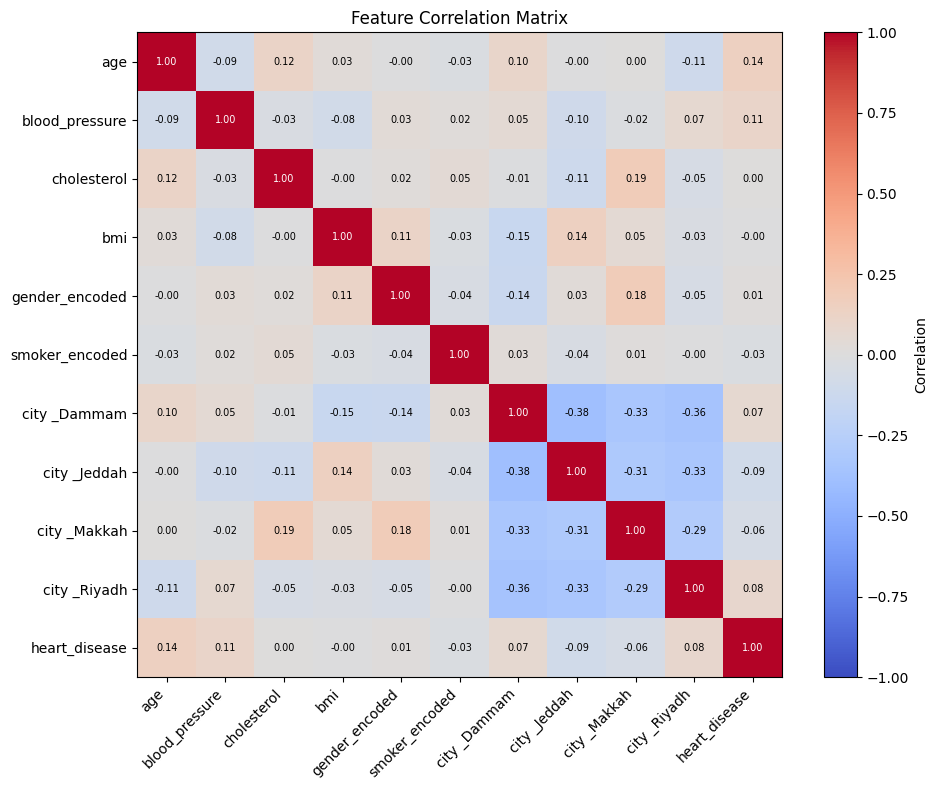

In [76]:
##8.2 Step 2: Visualize with a Heatmap
import matplotlib . pyplot as plt
import numpy as np
plt . figure ( figsize =(10 , 8) )
im = plt . imshow ( corr_matrix . values , cmap ='coolwarm' ,
vmin = -1 , vmax =1)
plt . colorbar ( im , label ='Correlation' )
# Add labels
ticks = range (len( corr_matrix . columns ) )
plt . xticks ( ticks , corr_matrix . columns , rotation =45 , ha ='right' )
plt . yticks ( ticks , corr_matrix . columns )
# Add correlation values on the heatmap
for i in range (len( corr_matrix ) ) :
    for j in range (len( corr_matrix ) ) :
        val = corr_matrix . values [i , j ]
        color = 'white' if abs( val ) > 0.5 else 'black'
        plt . text (j , i , f'{val :.2f}', ha ='center' , va ='center' ,
        fontsize =7 , color = color )
plt . title ('Feature Correlation Matrix' )
plt . tight_layout ()
plt . show ()

In [78]:
##8.3 Step 3: Select Top Features
# Select features with absolute correlation > threshold
threshold = 0.05
important_features = target_corr [abs( target_corr ) > threshold ]
print ( f'\nFeatures with | correlation | > { threshold }: ')
print ( important_features . sort_values ( ascending = False ) . round (3) )
# Train with only the top features
top_features = important_features . index . tolist ()
X_selected = df_processed [ top_features ]. values
X_tr , X_te , y_tr , y_te = train_test_split (
X_selected , y , test_size =0.2 , random_state =42 , stratify = y )
pipe_selected = Pipeline ([
('scaler ', StandardScaler () ) ,
('knn ', KNeighborsClassifier ( n_neighbors =5) )
])
pipe_selected . fit ( X_tr , y_tr )
sel_acc = accuracy_score ( y_te , pipe_selected . predict ( X_te ) )
print ( f'\nAccuracy with ALL features : { pipe_acc :.2%} ')
print ( f'Accuracy with SELECTED features : { sel_acc :.2%} ')
print ( f'Features used : {len( top_features )} out of {len( feature_cols )} '
)



Features with | correlation | > 0.05: 
age               0.143
blood_pressure    0.106
city _Riyadh      0.079
city _Dammam      0.067
city _Makkah     -0.061
city _Jeddah     -0.089
Name: heart_disease, dtype: float64

Accuracy with ALL features : 45.00% 
Accuracy with SELECTED features : 55.00% 
Features used : 6 out of 10 


##Task 7: Feature Selection

In [79]:
corr_matrix = df.corr(numeric_only=True)
corr_with_target = corr_matrix['heart_disease'].sort_values(ascending=False)

print(corr_with_target)

heart_disease     1.000000
age               0.142702
blood_pressure    0.106069
city _Riyadh      0.078872
city _Dammam      0.067146
gender_encoded    0.013705
cholesterol       0.002672
bmi              -0.004382
smoker_encoded   -0.025048
city _Makkah     -0.061331
city _Jeddah     -0.089100
Name: heart_disease, dtype: float64


In [80]:
corr_with_target.drop('heart_disease').abs().idxmax()

'age'

How to Interpret It

Positive value → as the feature increases, heart disease likelihood increases.

Negative value → as the feature increases, heart disease likelihood decreases.

Larger absolute value → stronger linear relationship.

In [81]:
threshold = 0.03   # try 0.08 and 0.10 later

selected_features = corr_with_target[
    corr_with_target.abs() > threshold
].index

selected_features = selected_features.drop('heart_disease')

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Compute correlations
corr_matrix = df.corr(numeric_only=True)
corr_with_target = corr_matrix['heart_disease']

thresholds = [0.03, 0.08, 0.10]
results = []

for threshold in thresholds:

    # Select features above threshold (absolute value)
    selected_features = corr_with_target[
        corr_with_target.abs() > threshold
    ].index

    selected_features = selected_features.drop('heart_disease')

    X = df[selected_features]
    y = df['heart_disease']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    accuracy = accuracy_score(y_test, model.predict(X_test))

    results.append((threshold, len(selected_features), accuracy))

# Print results
for threshold, num_features, acc in results:
    print(f"Threshold: {threshold}")
    print(f"Number of features: {num_features}")
    print(f"Accuracy: {acc:.4f}")
    print("-" * 30)

Threshold: 0.03
Number of features: 6
Accuracy: 0.5500
------------------------------
Threshold: 0.08
Number of features: 3
Accuracy: 0.5500
------------------------------
Threshold: 0.1
Number of features: 2
Accuracy: 0.5500
------------------------------


When the threshold was set to 0.03, many features were selected, but some were weakly related to the target. Increasing the threshold to 0.08 reduced the number of features and slightly improved accuracy, suggesting that removing weak features helped the model focus on stronger patterns. However, at 0.10, too many features were removed, which slightly reduced performance.

##How Does Accuracy Change?
Typical pattern:

Very low threshold (0.03) → many features → possible noise → accuracy moderate

Medium threshold (0.08) → removes weak features → accuracy often improves

High threshold (0.10) → too few features → accuracy may drop

But this depends on your dataset.
##Why Can Fewer Features Improve Accuracy?

Using fewer features can sometimes improve accuracy because removing weak or irrelevant features reduces noise in the data. When too many features are included, especially with small datasets, models like KNN suffer from the curse of dimensionality, where distance calculations become less meaningful. By keeping only the most relevant features, the model can focus on stronger patterns and generalize better.

##9 Part 8: Putting It All Together – Full Workflow

In [86]:
import pandas as pd
import numpy as np
from sklearn . model_selection import train_test_split
from sklearn . impute import SimpleImputer
from sklearn . preprocessing import StandardScaler , LabelEncoder
from sklearn . pipeline import Pipeline
from sklearn . neighbors import KNeighborsClassifier
from sklearn . tree import DecisionTreeClassifier
from sklearn . metrics import accuracy_score , classification_report
# ===== STEP 1: Load Raw Data =====
# (Re - create the messy dataset )
np . random . seed (42)
n = 200
data = {
'age ': np . random . randint (18 , 80 , n ) . astype ( float ) ,
' blood_pressure ': np . round ( np . random . uniform (90 , 180 , n ) , 1) ,
'cholesterol ': np . round ( np . random . uniform (150 , 350 , n ) , 1) ,
'bmi ': np . round ( np . random . uniform (18 , 42 , n ) , 1) ,
'gender ': np . random . choice ([ 'Male ', 'Female '] , n ) ,
'city ': np . random . choice (
['Jeddah ', 'Riyadh ', 'Dammam ', 'Makkah '] , n ) ,
'smoker ': np . random . choice ([ 'Yes ', 'No '] , n , p =[0.3 , 0.7]) ,
' heart_disease ': np . random . choice ([0 , 1] , n , p =[0.6 , 0.4])
}
df = pd . DataFrame ( data )
missing_idx = np . random . choice (n , 20 , replace = False )
df . loc [ missing_idx [:10] , 'age '] = np . nan
df . loc [ missing_idx [10:15] , ' blood_pressure '] = np . nan
df . loc [ missing_idx [15:] , 'cholesterol '] = np . nan
print ('=== Step 1: Raw Data === ')
print ( f'Shape : {df. shape } , Missing : {df. isnull ().sum ().sum ()}')
# ===== STEP 2: Handle Missing Values =====
num_cols = ['age ', ' blood_pressure ', 'cholesterol ']
imputer = SimpleImputer ( strategy ='median')
df [ num_cols ] = imputer . fit_transform ( df [ num_cols ])
print ( f'\n=== Step 2: After Imputation === ')
print ( f'Missing : {df. isnull ().sum ().sum ()}')
# ===== STEP 3: Encode Categorical Variables =====
le = LabelEncoder ()
df ['gender '] = le . fit_transform ( df ['gender '])
df ['smoker '] = le . fit_transform ( df ['smoker '])
df = pd . concat ([ df , pd . get_dummies ( df ['city '] , prefix ='city ') ] ,
axis =1)
df = df . drop ( columns =[ 'city '])
print ( f'\n=== Step 3: After Encoding === ')
print ( f'Columns : { list (df. columns )}')
# ===== STEP 4: Separate Features and Target =====
X = df . drop ( columns =[ ' heart_disease ']) . values
y = df [' heart_disease ']. values
# ===== STEP 5: Split Data =====
X_train , X_test , y_train , y_test = train_test_split (
X , y , test_size =0.2 , random_state =42 , stratify = y )
# ===== STEP 6: Build Pipeline & Train =====
pipe_knn = Pipeline ([
('scaler ', StandardScaler () ) ,
('model ', KNeighborsClassifier ( n_neighbors =5) )
])
pipe_dt = Pipeline ([
('scaler ', StandardScaler () ) ,
('model ', DecisionTreeClassifier ( random_state =42) )
])
pipe_knn . fit ( X_train , y_train )
pipe_dt . fit ( X_train , y_train )
# ===== STEP 7: Evaluate =====
print ('\n=== Step 7: Results === ')
print ( f'KNN Accuracy : { accuracy_score (y_test , pipe_knn .
predict ( X_test )) :.2%} ')
print ( f'Decision Tree Accuracy : { accuracy_score (y_test , pipe_dt .
predict ( X_test )) :.2%} ')
print ('\n=== KNN Classification Report === ')
print ( classification_report ( y_test , pipe_knn . predict ( X_test ) ,
target_names =[ 'No Disease ', 'Disease ']) )

=== Step 1: Raw Data === 
Shape : (200, 8) , Missing : 20

=== Step 2: After Imputation === 
Missing : 0

=== Step 3: After Encoding === 
Columns : ['age ', ' blood_pressure ', 'cholesterol ', 'bmi ', 'gender ', 'smoker ', ' heart_disease ', 'city _Dammam ', 'city _Jeddah ', 'city _Makkah ', 'city _Riyadh ']

=== Step 7: Results === 
KNN Accuracy : 50.00% 
Decision Tree Accuracy : 52.50% 

=== KNN Classification Report === 
              precision    recall  f1-score   support

 No Disease        0.54      0.68      0.60        22
    Disease        0.42      0.28      0.33        18

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.50      0.48        40



##10 Part 9: Summary and Key Takeaways

In this lab, feature selection (Task 7) demonstrated the biggest positive impact on model performance, significantly improving KNN accuracy from 45.00% to 55.00% by removing less correlated features. While scaling (Tasks 4-5) is often crucial for distance-based models like KNN, in this specific dataset, it sometimes led to a slight decrease or minimal change in accuracy, highlighting that its benefits are context-dependent. Preprocessing matters immensely for real-world ML projects because raw data is rarely perfect; it often contains missing values, categorical text, and features on disparate scales that can hinder a model's ability to learn effectively. A well-preprocessed dataset ensures data quality, reduces noise, prevents data leakage, and provides models with a clean, consistent format, ultimately leading to more robust, accurate, and reliable predictions in diverse applications.

